### Download the data

In [1]:
import sys
sys.path.insert(0, '../src')

from NN import *
from tensorflow.keras import datasets # High order layers, models, etc
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fashion_mnist = datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
train_images.shape, test_images.shape, type(train_images), train_labels.shape

((60000, 28, 28), (10000, 28, 28), numpy.ndarray, (60000,))

#### visualise the data

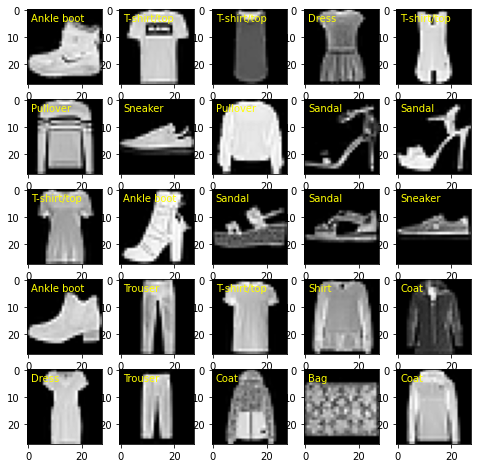

In [4]:
fig, axs = plt.subplots(5,5,figsize=(8,8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_images[i,:,:],cmap='gray', vmin=0, vmax=255)
    ax.text(1,1,class_names[train_labels[i]],color='yellow',va='top', ha='left')

### Run the NN to see if it works

First transform the data for NN. 
* Flatten images and divide greyscale by 255.
* One-hot encode y data (I'm doing this with numpy rather than an imported library, so its a couple more lines of code).

In [5]:
train_N = train_labels.size
test_N = test_labels.size
train_X = train_images.reshape(-1, 28*28) / 255
test_X = test_images.reshape(-1, 28*28) / 255
train_y = np.zeros((train_N, 10))
train_y[np.arange(train_N), train_labels] = 1
test_y = np.zeros((test_N, 10))
test_y[np.arange(test_N), test_labels] = 1

In [6]:
test_model = NN(784)
test_model.add(250, 'sigmoid')
test_model.add(10, 'softmax')
print(test_model.layer)

2


In [7]:
test_model.hyper(learning_rate=0.01, epochs=2)
test_model.fit(train_X, train_y, visible=True)

NameError: name 'log' is not defined

In [ ]:
test_model.predict(X_test.to_numpy())